# The Spark Foundation-Data science and Business Analytics Internship
## By Kamakshi Paul

## TASK 2-Prediction using unsupervised machine learning

## STEP-1:Importing required libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans

#To ignore the warning
import warnings as wg
wg.filterwarnings("ignore")

## STEP-2:Reading the data from the source

In [13]:
# Reading data iris dataset
df=pd.read_csv(r"C:\Users\admin\Anaconda2\Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## STEP-3:Finding some properties of the data

In [14]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [15]:
df.shape

(150, 6)

In [16]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [18]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 6.5+ KB


In [20]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## STEP-4: Preparation of data

In [22]:
#now we will drop the label column because it is an unsupervised learning problemra
iris=pd.DataFrame(df)
iris_df=iris.drop(columns=['Species','Id'])
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## STEP-5:Finding the optimum number of clusters
Before clustering the data using kmeans, we need to specify the number of clusters.In order to find the optimum number of clusters, there are various methods available like Silhoutte coefficients and the Elbow method is used.

In [23]:
#Calculating the within-cluster sum of square

within_cluster_sum_of_square=[]

clusters_range=range(1,15)
for k in clusters_range:
    km=KMeans(n_clusters=k)
    km=km.fit(iris_df)
    within_cluster_sum_of_square.append(km.inertia_)

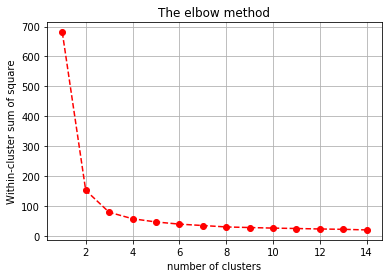

In [26]:
#plotting the "within-cluster sum of square" against clusters range

plt.plot(clusters_range,within_cluster_sum_of_square,'go--',color="red")
plt.title('The elbow method')
plt.xlabel('number of clusters')
plt.ylabel('Within-cluster sum of square')
plt.grid()
plt.show()

## STEP-6: Applying K means clustering on the data

In [27]:
from sklearn.cluster import KMeans

model=KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
predictions=model.fit_predict(iris_df)

## STEP-7:Visualizing the clusters

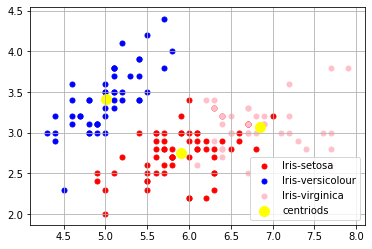

In [30]:
x=iris_df.iloc[:,[0,1,2,3]].values
plt.scatter(x[predictions==0,0],x[predictions==0,1],s=25,c='red',label='Iris-setosa')
plt.scatter(x[predictions==1,0],x[predictions==1,1],s=25,c='blue',label='Iris-versicolour')
plt.scatter(x[predictions==2,0],x[predictions==2,1],s=25,c='pink',label='Iris-virginica')


plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=100,c='yellow',label='centriods')
plt.legend()
plt.grid()
plt.show()